# I- PRESENTATION DU PROBLEME RESOLU PAR MON MODELE


### Tout d'abord le modele utilise ici est le modele XGBOOST
### Ce dernier nous permettra de faire la classification pour savoir si une personne est depiste comme diabetique ou pas suivant 7 caracteristiques

### (Le nombre de grossesse, le taux de glucose dans le sang, la pression sangine, le taux d'insuline,  l'age, DiabetesPedigreeFunction(Qui donne une probabilite base sur l'historique familiale d'une personne), BMI(Body Mass Index)(Qui permet de voir si une personne doit perdre ou pas du poids))

# II- IMPLEMENTATION DU CODE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost  import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('pima-indians-diabetes-database/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print(df.dtypes.unique())

[dtype('int64') dtype('float64')]


In [8]:
100*(df.isnull().sum())/(df.shape[0])

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

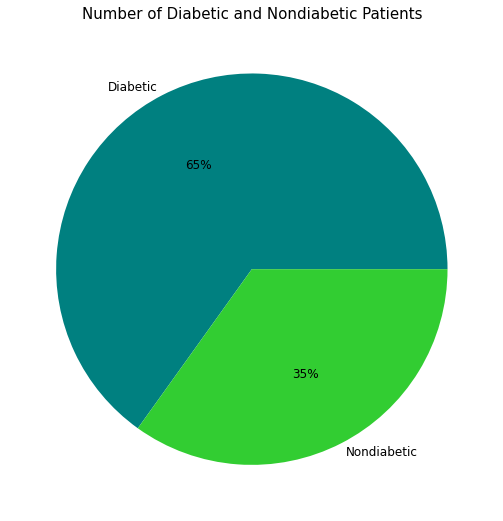

In [10]:
plt.figure(figsize=(9,9))
plt.pie(x=[500,268], labels=[ 'Diabetic', 'Nondiabetic'], autopct='%1.0f%%',pctdistance=0.6,labeldistance=1.05,textprops={'fontsize':12},colors=['teal','limegreen'])
plt.title('Number of Diabetic and Nondiabetic Patients',loc='center', fontsize=15)
plt.show()

In [11]:
df['Outcome']=df['Outcome'].apply(lambda x: 'Diabetic' if x==1 else 'Nondiabetic')

In [12]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Nondiabetic


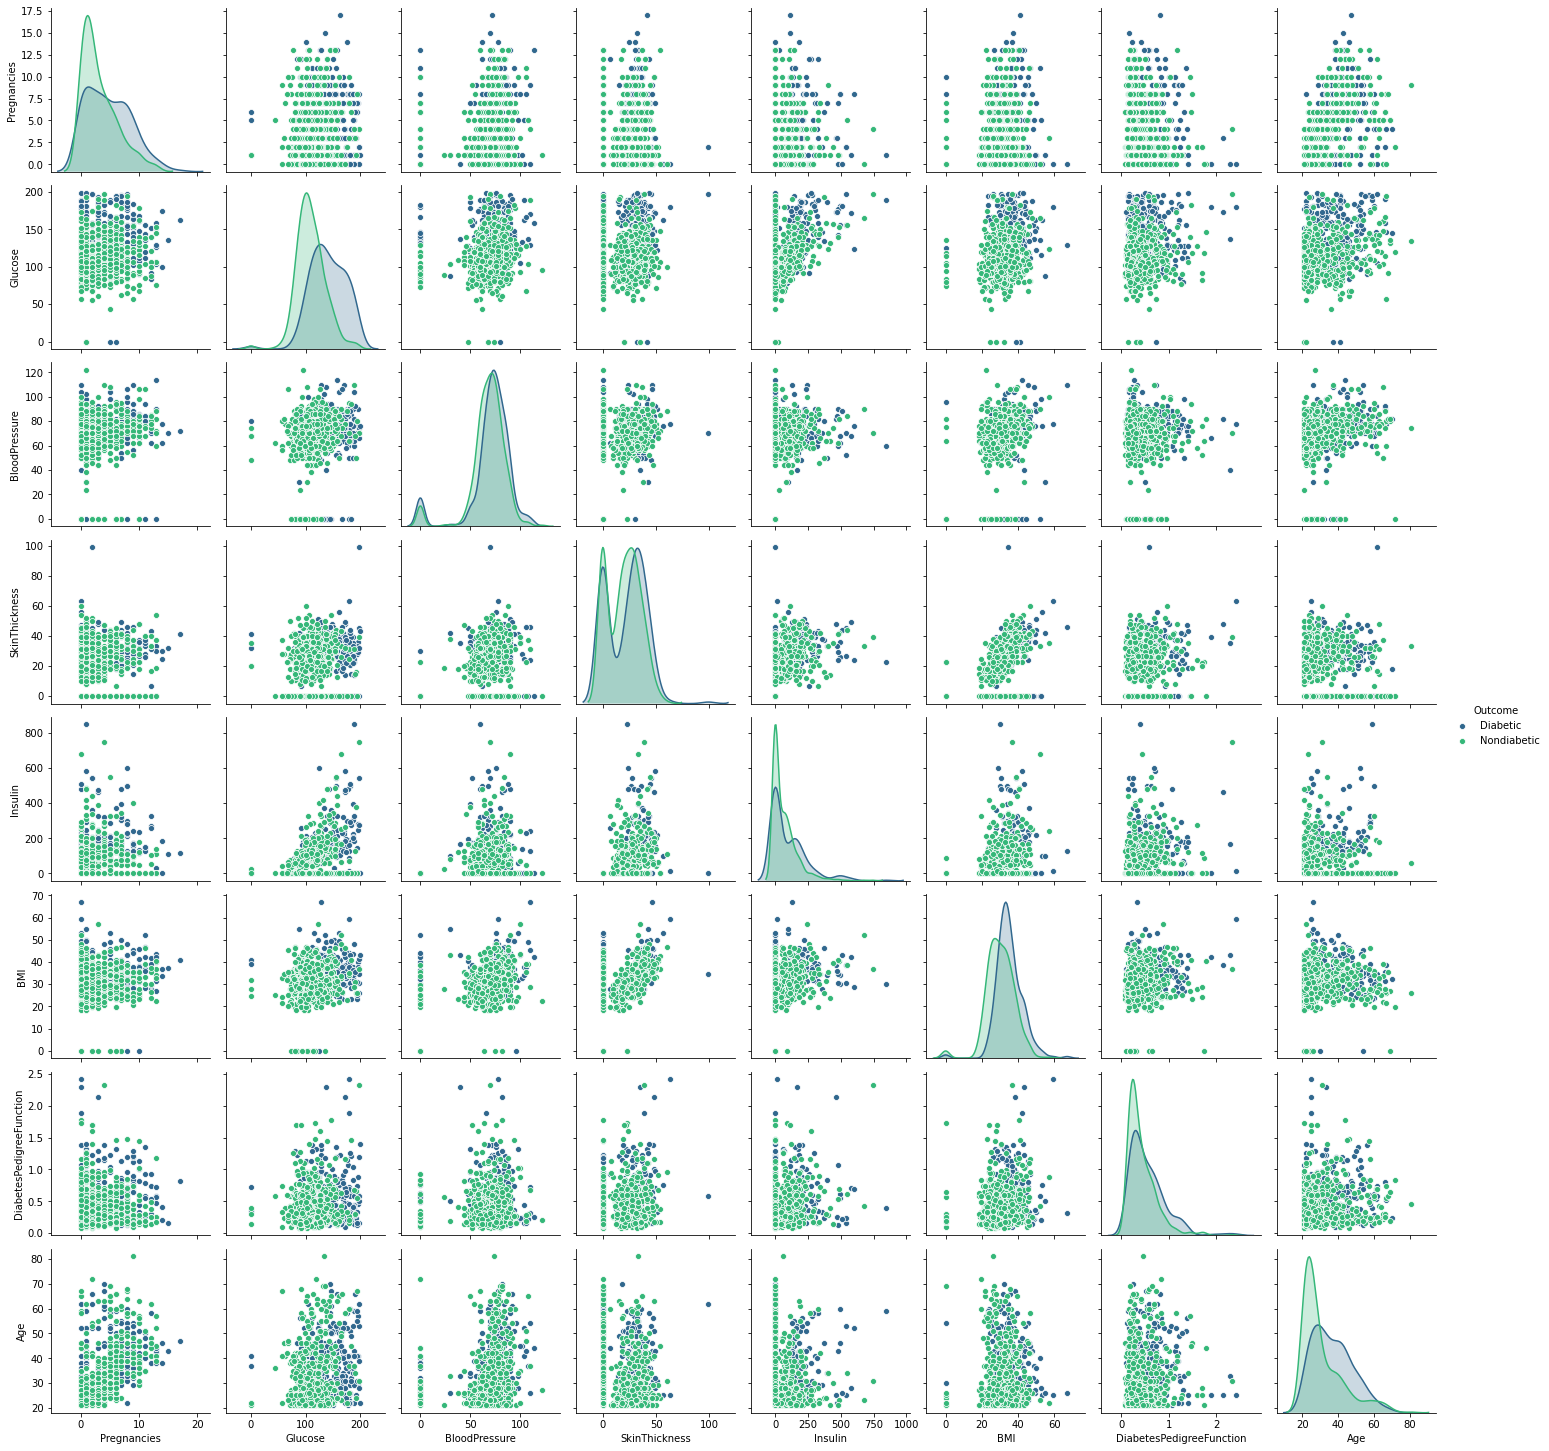

In [13]:
sns.pairplot(df,hue='Outcome',palette='viridis')
plt.show()

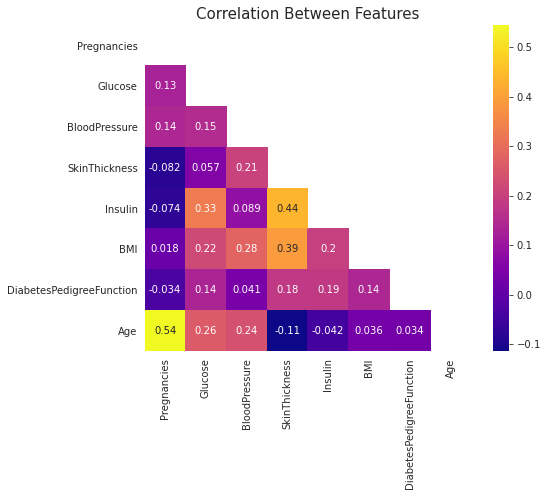

In [14]:
plt.figure(figsize=(8,6))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True, cmap= 'plasma')
plt.title('Correlation Between Features', fontsize=15)
plt.show()

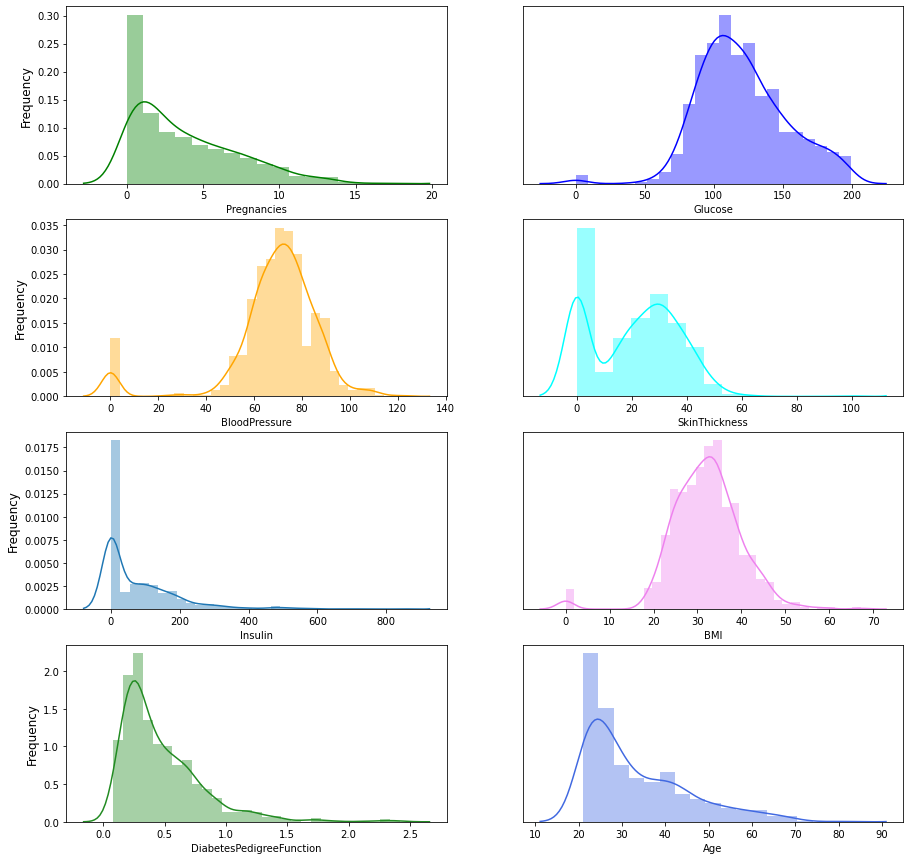

In [15]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.distplot(df['Pregnancies'], color='green')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,2)
sns.distplot(df['Glucose'], color='blue')
plt.yticks([])

plt.subplot(4,2,3)
sns.distplot(df['BloodPressure'], color='orange')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,4)
sns.distplot(df['SkinThickness'], color='cyan')
plt.yticks([])

plt.subplot(4,2,5)
sns.distplot(df['Insulin'])
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,6)
sns.distplot(df['BMI'], color='violet')
plt.yticks([])

plt.subplot(4,2,7)
sns.distplot(df['DiabetesPedigreeFunction'], color='forestgreen')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,8)
sns.distplot(df['Age'], color='royalblue')
plt.yticks([])
plt.show()

In [16]:
X=df.drop(['Outcome'], axis=1)
y=df['Outcome'].apply(lambda x: 0 if x=='Diabetic' else 1)

In [17]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# ici subsample nous permet de selectionner un pourcentage de donnees de facon aleatoire pour creer chaque arbre
# ici colsample_bytree nous permet de faire de meme mais pour les caracteristiques

xgbc = XGBClassifier(objective='binary:logistic',
                        tree_method='exact',
                        n_estimators=100,
                        max_depth=8,
                        learning_rate = 0.1,
                        gamma=0,
                        subsample=0.5,
                        colsample_bytree=1,
                        base_score=0.5)
xgbc.fit(X_trian,y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [26]:
prediction_xgbc=xgbc.predict(X_test)

In [27]:
print(confusion_matrix(y_test,prediction_xgbc))
print('\n')
print(classification_report(y_test,prediction_xgbc))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_xgbc), ndigits=2))

[[33 14]
 [14 93]]


              precision    recall  f1-score   support

           0       0.70      0.70      0.70        47
           1       0.87      0.87      0.87       107

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



Accuracy Score:  0.82


# III- INTERPRETATION DES RESULTATS

### Ici nous pouvons observer un taux de succes assez eleve qui est de 80%, nous remarquons que la majorite de ceux qui sont declare diabetique ont ete bien precise diabetique, et aussi ce qui sont precise non-diabetique le sont en grande majorite, et cela ce voit avec la precision

### macro avg Ici on retourne une moyenne considerant chaque caracteristique

### weighted avg 